In [92]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [93]:
#Initializing dataset
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
        'C:/Users/yyasw/Downloads/archive (2)/dogscats/train',
        target_size=(128, 128),
        batch_size=32,
        class_mode='binary')

Found 23000 images belonging to 2 classes.


In [94]:
test_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = test_datagen.flow_from_directory(
        'C:/Users/yyasw/Downloads/archive (2)/dogscats/test1',
        target_size=(128, 128),
        batch_size=32,
        class_mode='binary')

Found 12500 images belonging to 1 classes.


In [95]:
cnn = tf.keras.models.Sequential()

In [96]:
#Convoution Layer

cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 2, activation = 'relu', input_shape = [128,128,3]))

In [97]:
#Pooling

cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2,strides = 2))

In [98]:
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 2, activation = 'relu'))

cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2,strides = 2))

In [99]:
#Flatten

cnn.add(tf.keras.layers.Flatten())

In [100]:
#Full connection

cnn.add(tf.keras.layers.Dense(units = 128,activation = 'relu'))

In [101]:
cnn.add(tf.keras.layers.Dense(units = 128,activation = 'softmax'))  

In [102]:
#Output Layer

cnn.add(tf.keras.layers.Dense(units = 1,activation = 'sigmoid'))

In [103]:
#compile the model

cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
History = cnn.fit(x = train_generator,y = None, validation_data = validation_generator, epochs = 10)

Epoch 1/10
719/719 [==============================] - 353s 489ms/step - loss: 0.6652 - accuracy: 0.6191 - val_loss: 0.8359 - val_accuracy: 0.2566
Epoch 2/10
719/719 [==============================] - 285s 396ms/step - loss: 0.6086 - accuracy: 0.6978 - val_loss: 0.7966 - val_accuracy: 0.4928
Epoch 3/10
719/719 [==============================] - 332s 461ms/step - loss: 0.5605 - accuracy: 0.7336 - val_loss: 0.8243 - val_accuracy: 0.5213
Epoch 4/10
719/719 [==============================] - 339s 472ms/step - loss: 0.5169 - accuracy: 0.7614 - val_loss: 0.8881 - val_accuracy: 0.5094
Epoch 5/10
719/719 [==============================] - 343s 478ms/step - loss: 0.4821 - accuracy: 0.7821 - val_loss: 0.8128 - val_accuracy: 0.5930
Epoch 6/10
719/719 [==============================] - 307s 427ms/step - loss: 0.4551 - accuracy: 0.7940 - val_loss: 1.1097 - val_accuracy: 0.4206
Epoch 7/10
719/719 [==============================] - 300s 417ms/step - loss: 0.4264 - accuracy: 0.8107 - val_loss: 1.0030 -

In [ ]:
cnn.summary()

In [ ]:
import numpy as np
from keras.preprocessing.image import img_to_array,load_img
from keras.preprocessing import image
test_image = image.load_img ('C:/Users/yyasw/Downloads/archive (2)/dogscats/predict/cat1.jpg', target_size = (128,128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)
result = cnn.predict(test_image)
if result[0][0] == 1:
    prediction = 'Dog'
else:
    prediction = 'Cat'
print(prediction)




(-0.5, 63.5, 63.5, -0.5)

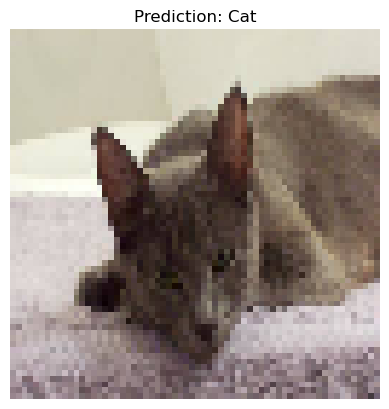

In [87]:
plt.figure()
plt . imshow(image . array_to_img(test_image[ 0 ]) , interpolation ='nearest')
plt.title("Prediction: "+prediction)
plt.axis("off")